In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew, norm, kurtosis
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.ticker as ticker  
from sklearn.metrics import r2_score 
from prettytable import PrettyTable 

In [33]:
obs= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/SANDY_HOOK_GESLA_PROCESSED.nc",decode_times=True)
model= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/SANDY_HOOK_MODEL_PROCESSED.nc",decode_times=True)

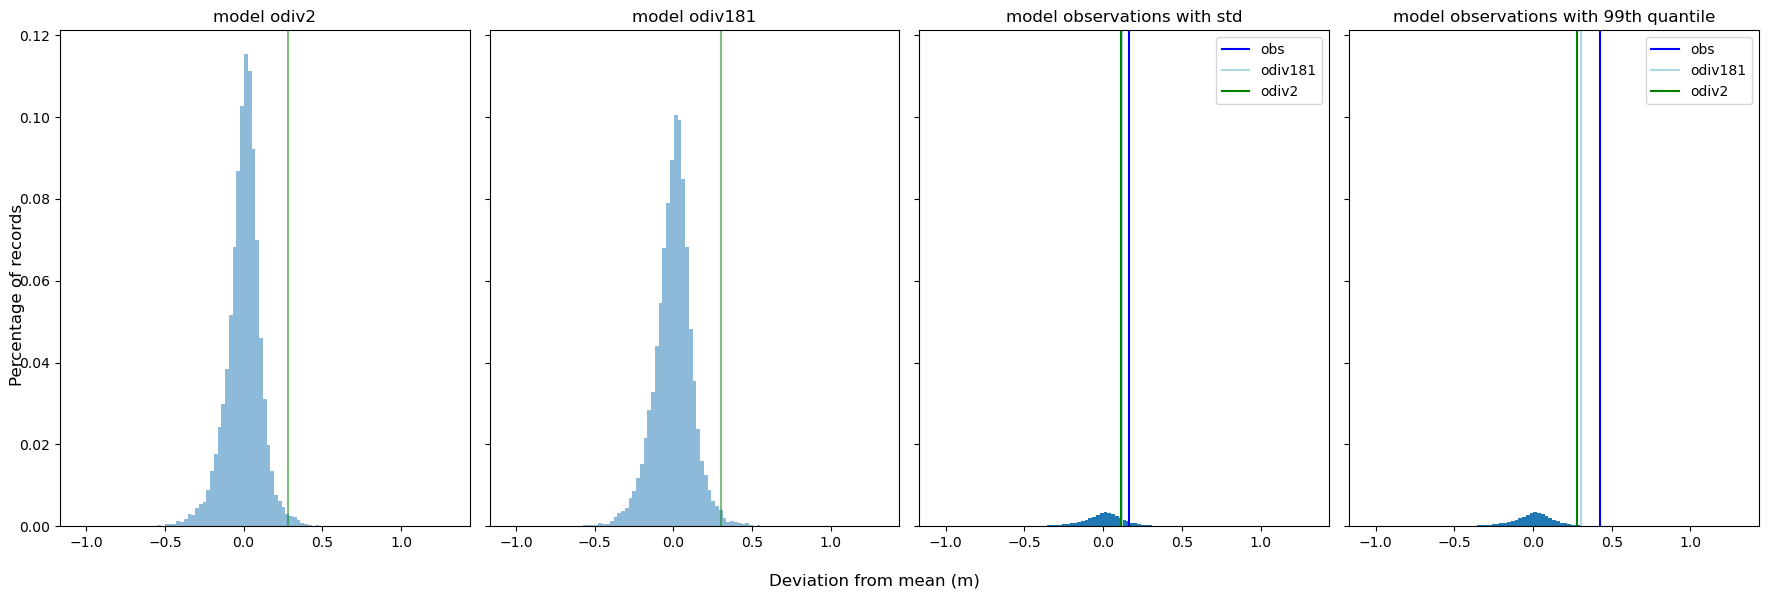

In [32]:
bins=np.linspace(np.float64(obs.sealevel_tr.min()),np.float64(obs.sealevel_tr.max()), 100) #set 100 bins between min and max of observations
fig, axs = plt.subplots(1, 4, sharey=True,sharex=True, tight_layout=True, figsize=(18,6)) ##creates subplot layout for each loaction individually


axs[0].hist(model.model_2, bins=bins, weights=1/len(model.model_2) * np.ones(len(model.model_2)),alpha=0.5, label='odiv2')# creates percentage histogram (using weights) of odiv2
axs[0].axvline(model.model_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0].set_title('model odiv2')


axs[1].hist(model.model_181, bins=bins, weights=1/len(model.model_181) * np.ones(len(model.model_181)),alpha=0.5, label='odiv181')# creates percentage histogram (using weights) of odiv181
axs[1].axvline(model.model_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1].set_title('model odiv181')


axs[2].hist(obs.sealevel_tr, bins=bins, weights=1/len(obs.sealevel_tr) * np.ones(len(obs.sealevel_tr)))# creates percentage histogram (using weights) of obs
axs[2].set_title('model observations with std')

axs[2].axvline(obs.sealevel_tr.std(), color='blue', label='obs') #with std values of all
axs[2].axvline(model.model_181.std(), color='lightblue', label='odiv181')
axs[2].axvline(model.model_2.std(), color='green', label='odiv2')
axs[2].legend()

axs[3].hist(obs.sealevel_tr, bins=bins, weights=1/len(obs.sealevel_tr) * np.ones(len(obs.sealevel_tr)))# creates percentage histogram (using weights) of obs
axs[3].set_title('model observations with 99th quantile')

axs[3].axvline(obs.sealevel_tr.quantile(0.99), color='blue', label='obs') # with quantile values of all
axs[3].axvline(model.model_181.quantile(0.99), color='lightblue', label='odiv181')
axs[3].axvline(model.model_2.quantile(0.99), color='green', label='odiv2')
axs[3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

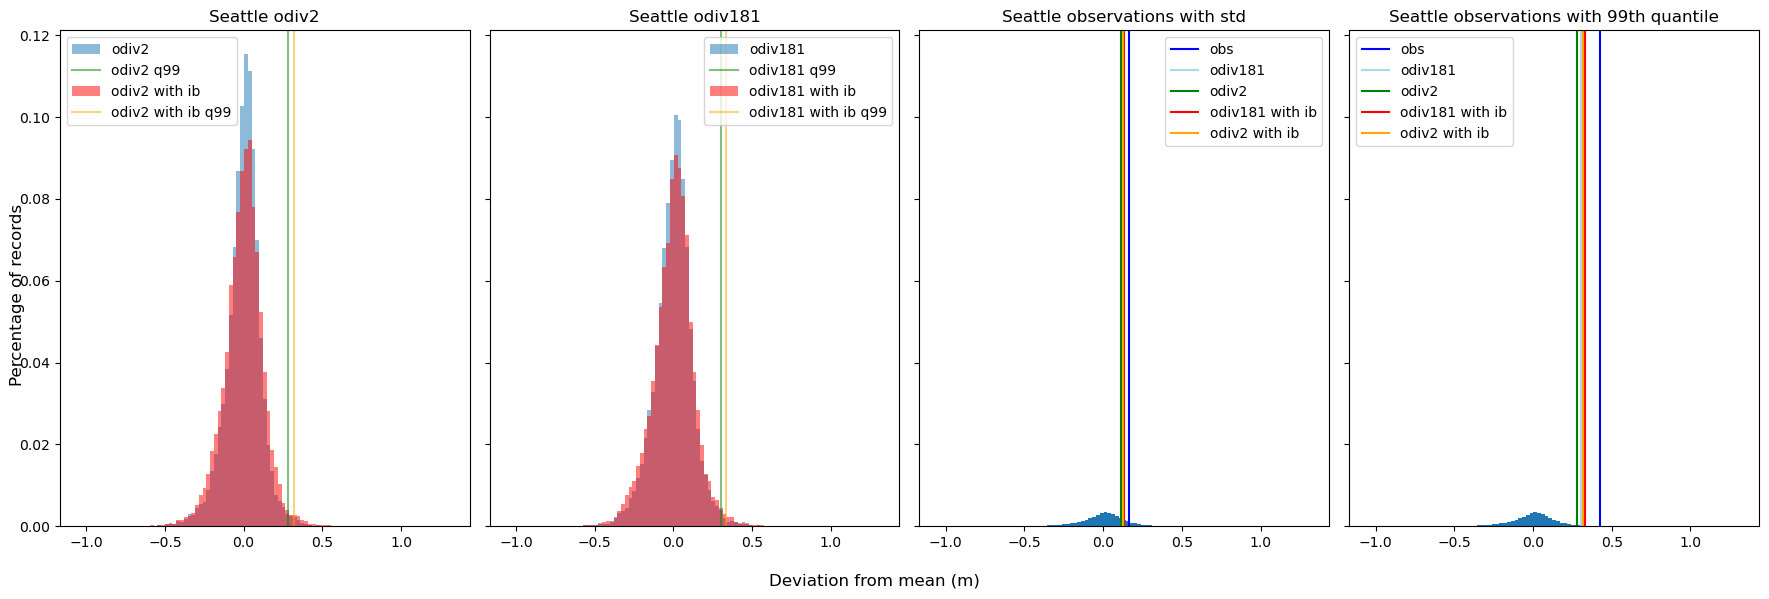

In [31]:
bins=np.linspace(np.float64(obs.sealevel_tr.min()),np.float64(obs.sealevel_tr.max()), 100)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0].hist(model.model_2, bins=bins, weights=1/len(model.model_2) * np.ones(len(model.model_2)),alpha=0.5, label='odiv2')
axs[0].axvline(model.model_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0].set_title('Seattle odiv2')

axs[0].hist(model.model_2_IB, bins=bins, weights=1/len(model.model_2_IB) * np.ones(len(model.model_2_IB)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0].axvline(model.model_2_IB.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0].set_title('Seattle odiv2')
axs[0].legend()

axs[1].hist(model.model_181, bins=bins, weights=1/len(model.model_181) * np.ones(len(model.model_181)),alpha=0.5, label='odiv181')
axs[1].axvline(model.model_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1].set_title('Seattle odiv181')

axs[1].hist(model.model_181_IB, bins=bins, color='red',alpha=0.5, weights=1/len(model.model_181_IB) * np.ones(len(model.model_181_IB)), label='odiv181 with ib')
axs[1].axvline(model.model_181_IB.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1].set_title('Seattle odiv181')
axs[1].legend()

axs[2].hist(obs.sealevel_tr, bins=bins, weights=1/len(obs.sealevel_tr) * np.ones(len(obs.sealevel_tr)))
axs[2].set_title('Seattle observations with std')

axs[2].axvline(obs.sealevel_tr.std(), color='blue', label='obs')
axs[2].axvline(model.model_181.std(), color='lightblue', label='odiv181')
axs[2].axvline(model.model_2.std(), color='green', label='odiv2')
axs[2].axvline(model.model_181_IB.std(), color='red', label='odiv181 with ib')
axs[2].axvline(model.model_2_IB.std(), color='orange',label='odiv2 with ib')
axs[2].legend()

axs[3].hist(obs.sealevel_tr, bins=bins, weights=1/len(obs.sealevel_tr) * np.ones(len(obs.sealevel_tr)))
axs[3].set_title('Seattle observations with 99th quantile')

axs[3].axvline(obs.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[3].axvline(model.model_181.quantile(0.99), color='lightblue', label='odiv181')
axs[3].axvline(model.model_2.quantile(0.99), color='green', label='odiv2')
axs[3].axvline(model.model_181_IB.quantile(0.99), color='red', label='odiv181 with ib')
axs[3].axvline(model.model_2_IB.quantile(0.99), color='orange',label='odiv2 with ib')
axs[3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()